#Importing libraries

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

#Data Preprocessing


###Traning Image preprocessing

In [3]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'fruit-and-vegetable-image-recognition/train',
    labels = 'inferred',
    label_mode = 'categorical',
    class_names = None,
    color_mode = 'rgb',
    batch_size = 32,
    image_size = (64,64),
    shuffle = True,
    seed = None,
    validation_split = None,
    subset = None,
    interpolation = 'bilinear',
    follow_links = False,
    crop_to_aspect_ratio = False
)

Found 3115 files belonging to 36 classes.


###validation image preprocessing

In [4]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'fruit-and-vegetable-image-recognition/validation',
    labels = 'inferred',
    label_mode = 'categorical',
    class_names = None,
    color_mode = 'rgb',
    batch_size = 32,
    image_size = (64,64),
    shuffle = True,
    seed = None,
    validation_split = None,
    subset = None,
    interpolation = 'bilinear',
    follow_links = False,
    crop_to_aspect_ratio = False
)

Found 351 files belonging to 36 classes.


#Building Model

In [8]:
with tf.device('/device:GPU:0'):
     cnn = tf.keras.models.Sequential()
     ###Building Convolution Layer
     cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[64,64,3]))
     cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
     cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
     cnn.add(tf.keras.layers.Dropout(0.25))
     
     cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
     cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
     cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
     cnn.add(tf.keras.layers.Dropout(0.25))

     cnn.add(tf.keras.layers.Flatten())
     cnn.add(tf.keras.layers.Dense(units=512,activation='relu'))
     cnn.add(tf.keras.layers.Dense(units=256,activation='relu'))
     
     cnn.add(tf.keras.layers.Dropout(0.5)) #To avoid overfitting
     
     #Outer Layer
     cnn.add(tf.keras.layers.Dense(units=36,activation='softmax'))
     
     ##Compiling and Training Phase
     cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
     cnn.summary()
     training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=33)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 64, 64, 32)        896       
                                                                 
 conv2d_11 (Conv2D)          (None, 62, 62, 32)        9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 31, 31, 32)        0         
                                                                 
 conv2d_12 (Conv2D)          (None, 31, 31, 64)        18496     
                                                                 
 conv2d_13 (Conv2D)          (None, 29, 29, 64)        36928     
                                                      

Saving Model

In [ ]:
cnn.save('trained_model.h5')

In [ ]:
training_history.history #returning dictionary of loss and accuracy

{'loss': [6.56768798828125,
  3.578012466430664,
  3.555244207382202,
  3.51578426361084,
  3.5146942138671875,
  3.4017531871795654,
  3.335704803466797,
  3.169743776321411,
  2.9924609661102295,
  2.874785900115967,
  2.70369815826416,
  2.5118765830993652,
  2.4244275093078613,
  2.273108720779419,
  2.165255546569824,
  2.0472004413604736,
  1.9189069271087646,
  1.7777467966079712,
  1.7569639682769775,
  1.7099107503890991,
  1.5526729822158813,
  1.5532690286636353,
  1.4634974002838135,
  1.3930227756500244,
  1.2884634733200073,
  1.2414586544036865,
  1.1953978538513184,
  1.0864191055297852,
  1.0771055221557617,
  0.9479728937149048,
  0.9319179058074951,
  0.9445487260818481],
 'accuracy': [0.03852327540516853,
  0.03338683769106865,
  0.04686998575925827,
  0.05714285746216774,
  0.056179776787757874,
  0.08571428805589676,
  0.1004815399646759,
  0.12937399744987488,
  0.18202246725559235,
  0.20288924872875214,
  0.24783307313919067,
  0.30401283502578735,
  0.33515247

In [ ]:
#Recoding the training history
import json
with open('training_history.json','w') as f:
    json.dump(str(training_history.history),f)

Calculating Accuracy of Model achieved on validation data

In [ ]:
training_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
print("Validation set Accuracy {}% ".format(training_history.history['val_accuracy'][-1] * 100)) #returning the last validation accuracy

Validation set Accuracy 79.20227646827698% 


Accuracy visualization

Training Visualization


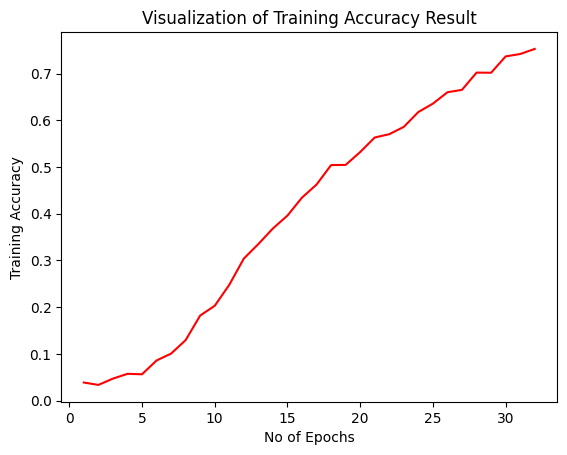

In [ ]:
epochs = [i for i in range(1,33)]
plt.plot(epochs,training_history.history['accuracy'], color="red")
plt.title('Visualization of Training Accuracy Result')
plt.xlabel('No of Epochs')
plt.ylabel('Training Accuracy')
plt.show()

Validation Accuracy Visualization

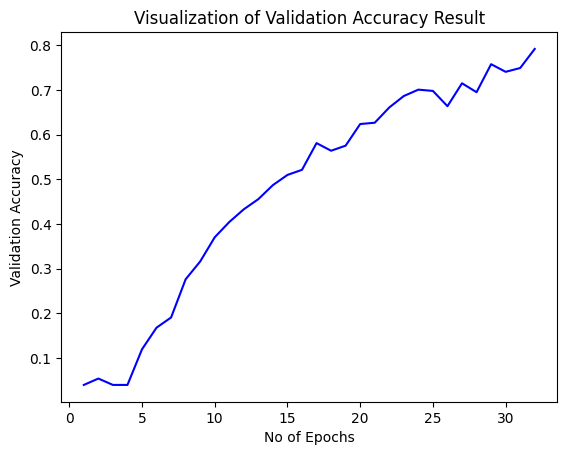

In [ ]:
plt.plot(epochs,training_history.history['val_accuracy'], color="blue")
plt.title('Visualization of Validation Accuracy Result')
plt.xlabel('No of Epochs')
plt.ylabel('Validation Accuracy')
plt.show()